# Simplest simulation of confidence reduction

- Two estimators
- Each one has a probability distribution
- They exchange their estimates
    - by the naive
    - by the conservative data exchange
- What if they repeated the exchange multiple times?
- What if the exchanged data gains some noises?



In [1]:
import random
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

## make two distributions

N: 1000
sum1: 0.9999999999999997
sum2: 0.9999676541896152


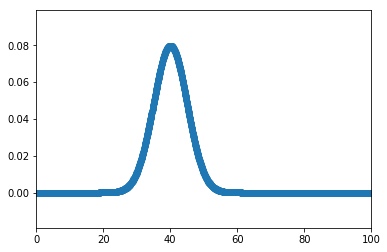

max at 40.0


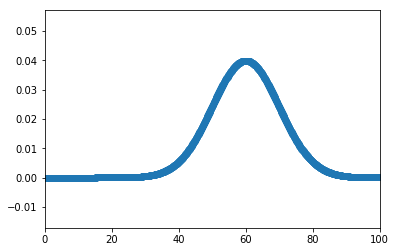

max at 60.0


In [2]:
x_max = 100
x_min = 0
dlt = 0.1
N = int((x_max-x_min)/dlt)
print('N: ' + str(N))
x_axis = [x_min + i * dlt for i in range(N)]

def p(x, mean, sigma):
    return math.exp(-0.5*(x - mean)**2 / sigma / sigma) / math.sqrt(2*math.pi*sigma*sigma)


dist1 = [p(x, 40, 5) for x in x_axis]
print('sum1: ' + str(sum(dist1)*dlt))
dist2 = [p(x, 60, 10) for x in x_axis]
print('sum2: ' + str(sum(dist2)*dlt))

plt.scatter(x_axis, dist1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist1)*dlt))
plt.scatter(x_axis, dist2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist2)*dlt))

# interaction functions

0.999999999999999


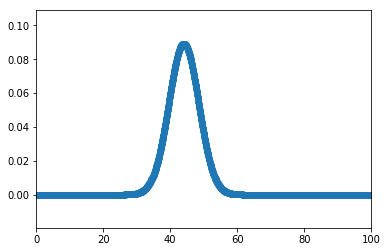

max at 44.0


In [3]:
def combine(p1, p2, off = 0):
    ans = []
    for i in range(len(p1)):
        if 0 <= i + off and i + off < len(p2):
            ans.append(p1[i]*p2[i+off])
        else:
            ans.append(0)
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

def divide(p, omega):
    ans1 = []
    ans2 = []
    for i in range(len(p)):
        ans1.append(math.pow(p[i], omega))
        ans2.append(math.pow(p[i], 1-omega))
    total1 = sum(ans1)*dlt
    total2 = sum(ans2)*dlt
    for i in range(len(ans1)):
        ans1[i] /= total1
        ans2[i] /= total2
    return [ans1, ans2]

p_comb = combine(dist1, dist2)
print(sum(p_comb)*dlt)
plt.scatter(x_axis, p_comb)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p_comb)*dlt))
# p1, p2 = divide(p, 0.4)
# print(sum(p1)*dlt)
# print(sum(p2)*dlt)
# plt.scatter(x_axis, p1)
# plt.xlim(x_min, x_max)
# plt.show()
# plt.scatter(x_axis, p2)
# plt.xlim(x_min, x_max)
# plt.show()

# repeated interactions

In [4]:
n_interactions = 100

## Naive

1.0
1.0


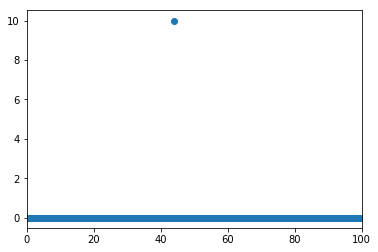

max at 44.0


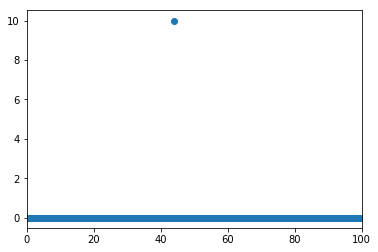

max at 44.0


In [5]:
p1 = list(dist1)
p2 = list(dist2)
for i in range(n_interactions):
    p1 = combine(p1, p2)
    p2 = list(p1)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

# Conservative

1.000000000000001
0.9999999999999993


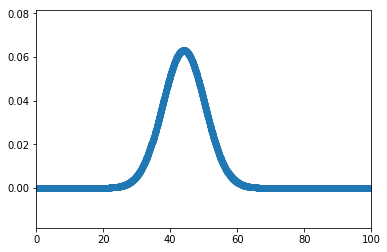

max at 44.0


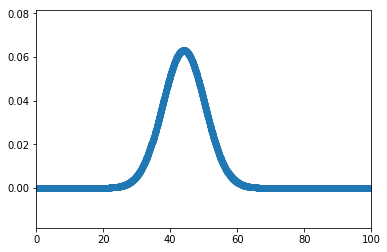

max at 44.0


In [6]:
p1 = list(dist1)
p2 = list(dist2)
omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)
    p1 = combine(p1_omega, p2_1_omega)
    p2 = combine(p2_omega, p1_1_omega)

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

# noises

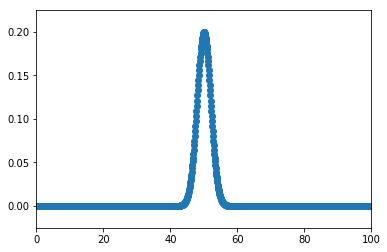

1.0


In [7]:
noise_sigma = 2
noise_mean = (x_min+x_max)/2.0
p_noise = [p(x, noise_mean, noise_sigma) for x in x_axis]
noise_mean_indx = len(p_noise)//2
plt.scatter(x_axis, p_noise)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_noise)*dlt)



# Convolution

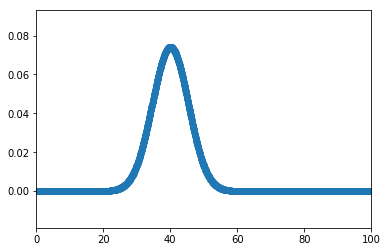

1.0


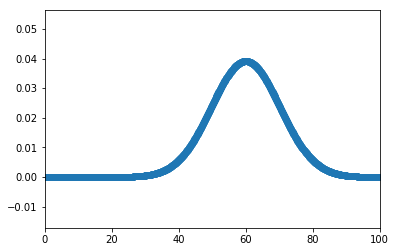

0.9999999999999997
noise: 51.416647484739805
off: 14 for 1000


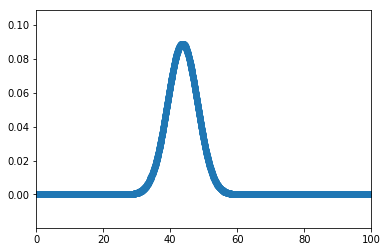

1.0
max at 43.6


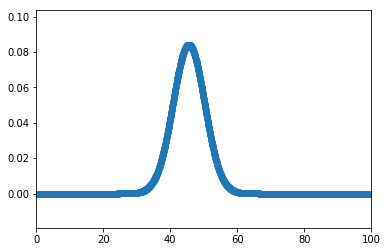

0.9999999999999996
max at 45.5


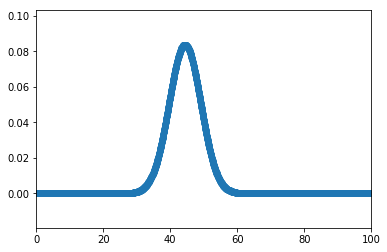

0.9999999999999997
max at 44.400000000000006


In [8]:
def conv(p1, p2, position):
    ans = [0] * len(p1)
    for i in range(len(p1)):
        for j in range(len(p2)):
            k = j - i + position
            if 0 <= k and k < len(p2):
                ans[i] += p1[j] * p2[k]
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

p1_conv = conv(dist1, p_noise, noise_mean_indx)
plt.scatter(x_axis, p1_conv)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p1_conv)*dlt)
p2_conv = conv(dist2, p_noise, noise_mean_indx)
plt.scatter(x_axis, p2_conv)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p2_conv)*dlt)


noise = random.gauss((x_min+x_max)/2.0, noise_sigma)
print('noise: ' + str(noise))
print('off: ' + str(int((noise-noise_mean)/dlt+0.5)) + ' for ' + str(len(dist1)))

p1_comb = combine(dist1, p2_conv, int((noise-noise_mean)/dlt+0.5))
plt.scatter(x_axis, p1_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p1_comb)*dlt)
print("max at " + str(np.argmax(p1_comb)*dlt))

p2_comb = combine(dist2, p1_conv, int(-(noise-noise_mean)/dlt+0.5))
plt.scatter(x_axis, p2_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p2_comb)*dlt)
print("max at " + str(np.argmax(p2_comb)*dlt))

p_comb = combine(p1_conv, p2_conv)
plt.scatter(x_axis, p_comb)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_comb)*dlt)
print("max at " + str(np.argmax(p_comb)*dlt))

# entropy

In [9]:
def entropy(p):
    ans = 0
    for i in range(len(p)):
        if p[i] > 0:
            ans -= p[i]*dlt * math.log2(p[i]*dlt)
    return ans

def D_KL(p,q):
    ans = 0
    for i in range(len(p)):
        if q[i] != 0:
            ans += p[i]*dlt * math.log2(p[i]/q[i])
        elif p[i] == 0:
            ans += 1000000000000000000000000000000000000000000000000000000
    return ans

def cross_entropy(p,q):
    return entropy(p) + D_KL(p,q)

#     ans = 0
#     for i in range(len(p)):
#         ans -= p[i]*dlt * math.log2(q[i]*dlt)
#     return ans

print('H(dist1): ' + str(entropy(dist1)))
print('H(dist2): ' + str(entropy(dist2)))
print('H(dist1;dist1): ' + str(cross_entropy(dist1, dist1)))
print('H(dist1;dist2): ' + str(cross_entropy(dist1, dist2)))
print('D_KL(dist1||dist1): ' + str(D_KL(dist1, dist1)))
print('D_KL(dist1||dist2): ' + str(D_KL(dist1, dist2)))

print('H(p_noise): ' + str(entropy(p_noise)))

H(dist1): 7.69095177495532
H(dist2): 8.690277198943757
H(dist1;dist1): 7.69095177495532
H(dist1;dist2): 11.0353312163999
D_KL(dist1||dist1): 0.0
D_KL(dist1||dist2): 3.34437944144458
H(p_noise): 6.3690236800680085


# naive with noises

0 iterations done...
5 iterations done...
10 iterations done...
15 iterations done...
20 iterations done...
25 iterations done...
30 iterations done...
35 iterations done...
40 iterations done...
45 iterations done...
50 iterations done...
55 iterations done...
60 iterations done...
65 iterations done...
70 iterations done...
75 iterations done...
80 iterations done...
85 iterations done...
90 iterations done...
95 iterations done...
0.9999999999999997
0.9999999999999997


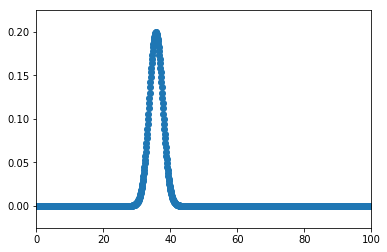

max at 35.7


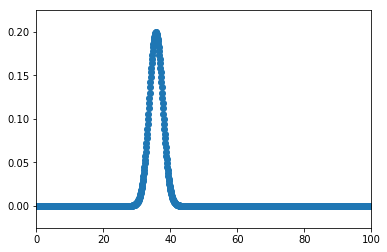

max at 35.7


In [10]:
p1 = list(dist1)
p2 = list(dist2)

H1 = [entropy(p1)]
H11 = [cross_entropy(dist1, p1)]
H2 = [entropy(p2)]
H22 = [cross_entropy(dist2, p2)]

for i in range(n_interactions):
    p1 = conv(p1, p_noise, noise_mean_indx)
    p2 = conv(p2, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)
    p1 = combine(p1, p2, int((noise-noise_mean)/dlt+0.5))
    p2 = list(p1)
    
    H1 += [entropy(p1)]
    H11 += [cross_entropy(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [cross_entropy(dist2, p2)]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)

plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

min(H(p1)): 6.369023680067996


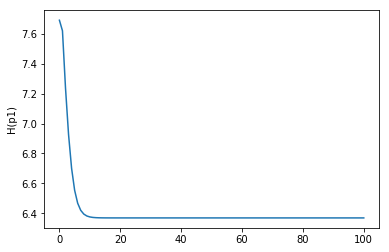

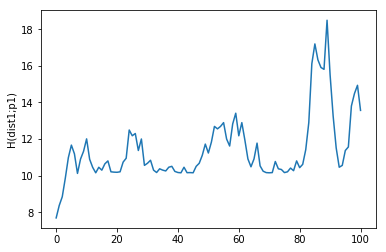

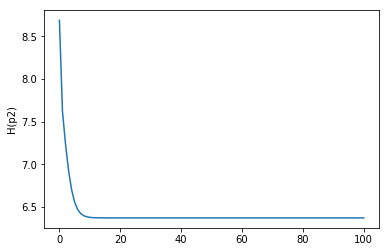

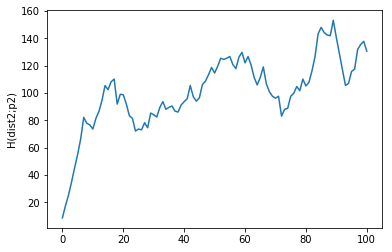

In [11]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('H(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('H(dist2;p2)')
plt.show()

# Conservative with noises

0 iterations done...
5 iterations done...
10 iterations done...
15 iterations done...
20 iterations done...
25 iterations done...
30 iterations done...
35 iterations done...
40 iterations done...
45 iterations done...
50 iterations done...
55 iterations done...
60 iterations done...
65 iterations done...
70 iterations done...
75 iterations done...
80 iterations done...
85 iterations done...
90 iterations done...
95 iterations done...
1.0000000000000009
0.9999999999999988


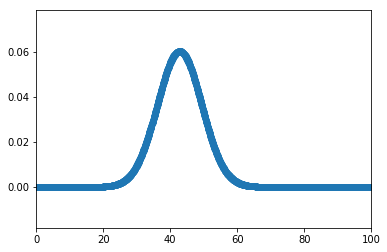

max at 42.800000000000004


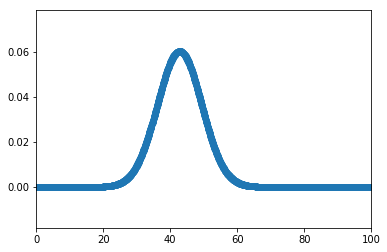

max at 42.800000000000004


In [12]:
p1 = list(dist1)
p2 = list(dist2)

H1 = [entropy(p1)]
H11 = [cross_entropy(dist1, p1)]
H2 = [entropy(p2)]
H22 = [cross_entropy(dist2, p2)]

omega = 0.9
for i in range(n_interactions):
    p1_omega, p1_1_omega = divide(p1, omega)
    p2_omega, p2_1_omega = divide(p2, omega)

    p1_to_pass = conv(p1_1_omega, p_noise, noise_mean_indx)
    p2_to_pass = conv(p2_1_omega, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p1 = combine(p1_omega, p2_to_pass, int((noise-noise_mean)/dlt+0.5))
    p2 = combine(p2_omega, p1_to_pass, int((noise-noise_mean)/dlt+0.5))

    H1 += [entropy(p1)]
    H11 += [cross_entropy(dist1, p1)]
    H2 += [entropy(p2)]
    H22 += [cross_entropy(dist2, p2)]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p1)*dlt)
print(sum(p2)*dlt)
plt.scatter(x_axis, p1)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p1)*dlt))
plt.scatter(x_axis, p2)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p2)*dlt))

min(H(p1)): 7.69095177495532


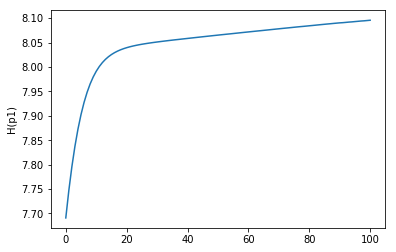

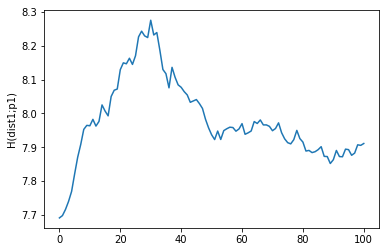

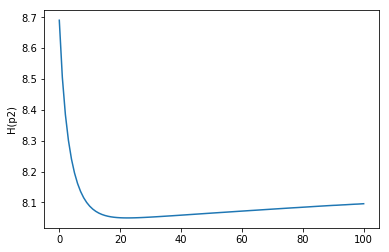

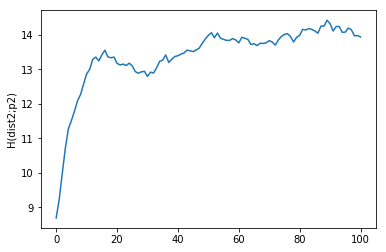

In [13]:
plt.plot(H1)
plt.ylabel('H(p1)')
print('min(H(p1)): ' + str(min(H1)))
plt.show()
plt.plot(H11)
plt.ylabel('H(dist1;p1)')
plt.show()
plt.plot(H2)
plt.ylabel('H(p2)')
plt.show()
plt.plot(H22)
plt.ylabel('H(dist2;p2)')
plt.show()